In [1]:
# Importamos las librerias de interes
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leemos el fichero de Demanda de electricidad descargado anteriormente desde la API de REE-ESIOS
RAW = pd.read_csv('REE_demanda_real.csv')
RAW.head(2)

,datetime_utc,demanda,datetime_CET
0,2013-12-31T23:00:00Z,24546.0,2014-01-01 00:00
1,2013-12-31T23:10:00Z,24309.0,2014-01-01 00:10


In [3]:
# Seleccionamos las columnas de interes y las renombramos
DEM = RAW[['datetime_CET','demanda']]
DEM.columns = ['fecha','demanda']

In [4]:
# Asignamos a la columna fecha el caracter temporal y la establecemos como indice de la serie
DEM.loc[:,'fecha'] = pd.DatetimeIndex(pd.to_datetime(DEM['fecha']))
DEM.set_index(['fecha'],inplace=True)

In [9]:
# Demanda media horaria
HDEM = DEM['demanda'].resample('1H').mean().to_frame()
HDEM.head()

,demanda
fecha,
2014-01-01 00:00:00,24301.666667
2014-01-01 01:00:00,23365.333333
2014-01-01 02:00:00,21672.500000
2014-01-01 03:00:00,20192.000000
2014-01-01 04:00:00,19220.666667


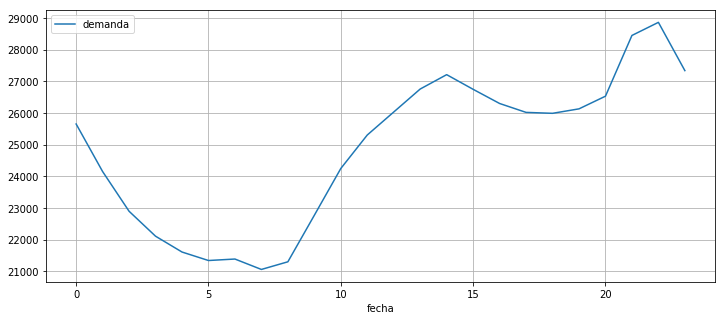

In [10]:
# Dia tipico. Representación sencilla
month = 'Aug' ; weekday = 'Sun' 

SEL = HDEM.loc[(HDEM.index.strftime('%a') == weekday) & (HDEM.index.strftime('%b') == month)]

# Group-by
GB = SEL.groupby(SEL.index.hour)

fig, ax = plt.subplots(figsize=(12,5))
GB.mean().plot(ax=ax)
ax.grid()

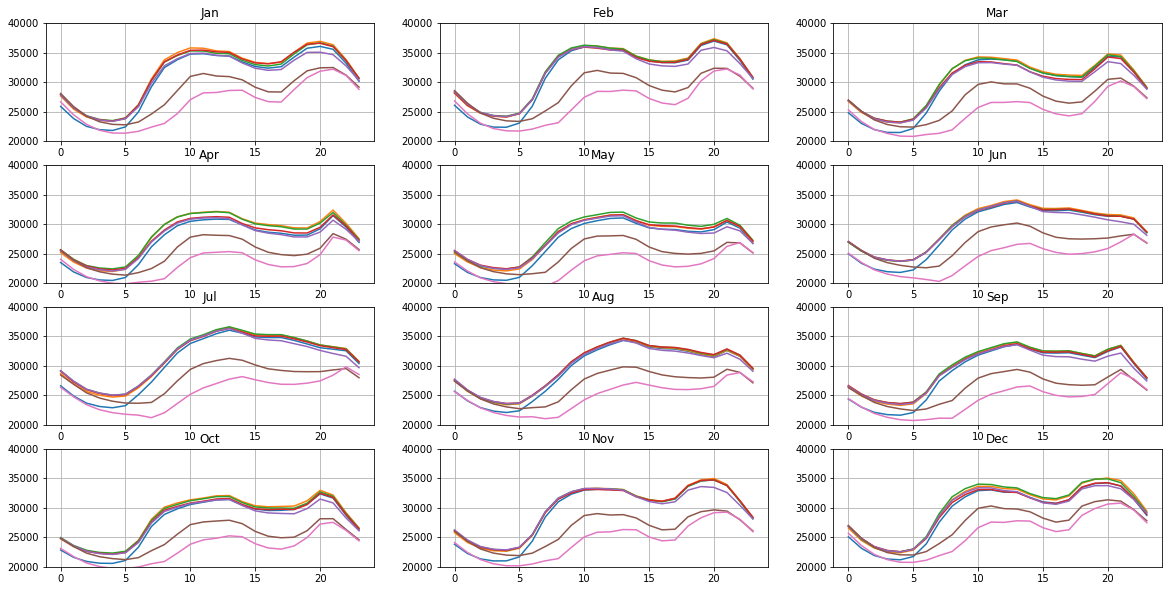

In [30]:
# Haremos una grafica sencilla y posteriormente iremos añadiendo "belleza"
fontsize = 10
fig, ax = plt.subplots(4,3,figsize=(20,10))

counter = 0
for month in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
    counter += 1 ; ax = plt.subplot(4,3,counter)
    for weekday in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']:
        SEL = HDEM.loc[(HDEM.index.strftime('%a') == weekday) & (HDEM.index.strftime('%b') == month)]
        GB = SEL.groupby(SEL.index.hour) 
        plt.plot(GB.mean(),label=weekday)
        plt.title('%s' % month)
        plt.grid('on')
        plt.ylim((20000,40000))
        plt.yticks(np.arange(20000,45000,5000))
        